In [2]:
import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt

# Plotly Express
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

In [3]:
from PDM2PCM import *
from PCM2PDM import *
from Serialize import *

In [1]:
wd = r"C:/Users/levyg/Documents/MEGA/Repositories/mems2sd_esp32/python/PDMSignalProcessing/data/"
fs_pdm = 2000000
fname = "pure_pdm_4_" + str(fs_pdm) + "hz"

data, fs_pcm = sf.read( wd+fname, 
                        channels=1, 
                        samplerate=int(fs_pdm/(2*16)), 
                        format='RAW', 
                        endian='LITTLE', 
                        subtype='PCM_16', 
                        dtype=np.int16
                    )

NameError: name 'sf' is not defined

In [11]:
serialize(data[0:6], to_print=True);
pdm_stream = 2*serialize(data)-1

[18770 22598     0     0 16727 17750]
[21065 18008     0     0 22337 22085]
[73 82 88 70  0  0  0  0 65 87 69 86]
[0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0]


In [14]:
len(pdm2pcm.data_pcm)

93648

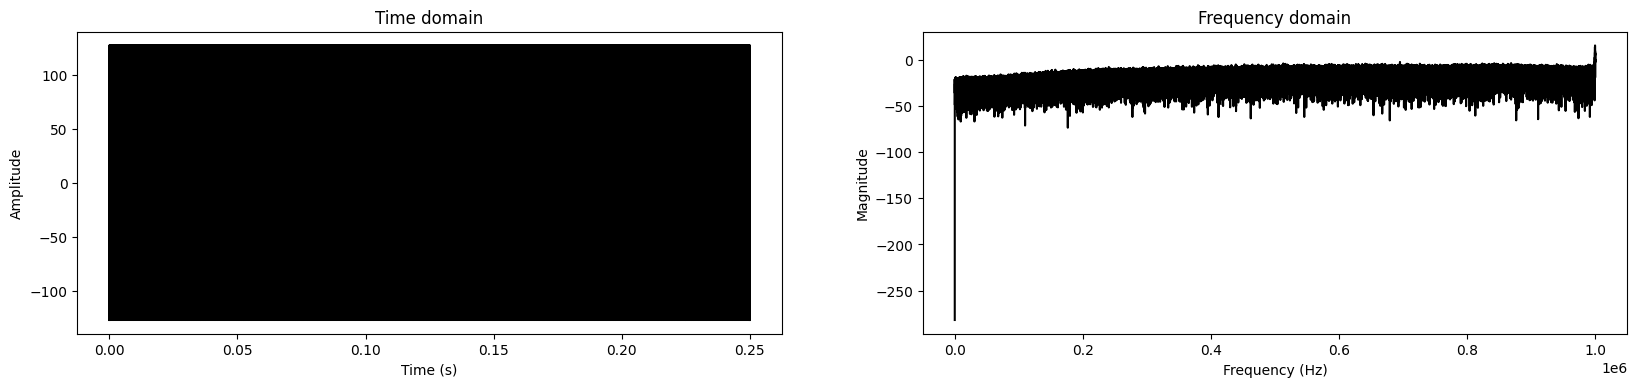

In [17]:
fs_pdm = 2000000
os = 64
fs_pcm = fs_pdm/os

pdm2pcm = PDM2PCM(pdm_stream[int(1e6):int(1.5e6)], fs_pdm=fs_pdm, os=1, stages=1, delay=1)
pdm2pcm.mag_plot()

# sd.play(pdm2pcm.data_pcm, samplerate=fs_pcm)

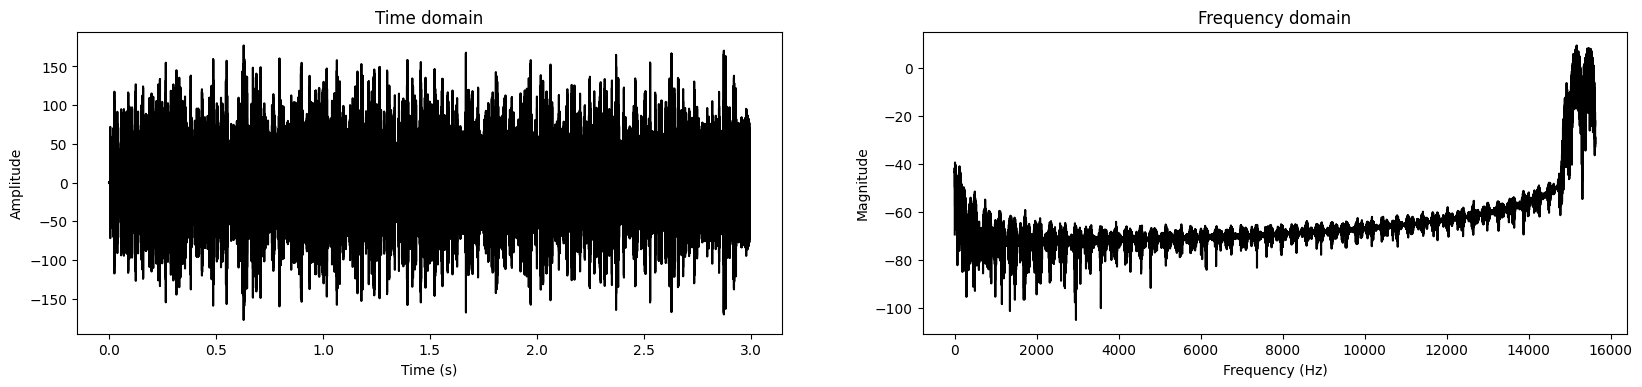

NameError: name 'asd' is not defined

In [7]:
from scipy.signal import firwin, lfilter

def lpf(x, fs, cutoff):

    nyquist = fs // 2
    norm_cutoff = cutoff / nyquist

    # low cut filter
    fil = firwin(255, norm_cutoff, pass_zero=False)
    lcf_x = lfilter(fil, 1, x)

    return lcf_x 

pdm2pcm.data_pcm = lpf(pdm2pcm.data_pcm, fs=fs_pcm, cutoff=15e3)
pdm2pcm.mag_plot()
sd.play(pdm2pcm.data_pcm, samplerate=fs_pcm)

In [10]:
fig = make_subplots(rows=1, cols=1, shared_xaxes=False)

fig.add_trace(
    go.Scatter(y=pdm_stream[int(1e6):int(1.0001e6)], line_shape='hv'),
    row=1, col=1
)

fig.update_layout(height=400, width=700)
fig.update_yaxes(title_text="", showgrid=True)
fig.update_xaxes(title_text="", showgrid=True, matches='x')

fig['layout']['yaxis1']['title']='Bit'
fig['layout']['xaxis1']['title']='Samples'

fig.show()